In [278]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [279]:
data = pd.read_csv('./data/clean/halving_02_to_04.csv')
data['date'] = pd.to_datetime(data['date'])
data['year'] = data['date'].dt.year
data['year_group'] = (data['year'] // 4) * 4

In [280]:
def resume_partial_features(group):
    group = group.sort_values(by='date')

    before_window = 4
    after_window =3

    if len(group) >= before_window + after_window:
        partial_group_features = group.iloc[0:before_window]
        features = {
            'market_cap_mean': partial_group_features['market_cap'].mean(),
            'market_cap_std': partial_group_features['market_cap'].std(),
            'price_mean': partial_group_features['price'].mean(),
            'price_std': partial_group_features['price'].std(),

            'circulating_supply_mean': partial_group_features['circulating_supply'].mean(),
            'circulating_supply_std': partial_group_features['circulating_supply'].std(),
            'circulating_supply_max': partial_group_features['circulating_supply'].max(),
            'circulating_supply_min': partial_group_features['circulating_supply'].min(),
            'volume_24h_mean': partial_group_features['volume_24h'].mean(),
            'volume_24h_std': partial_group_features['volume_24h'].std(),
            'volume_24h_max': partial_group_features['volume_24h'].max(),
            'volume_24h_min': partial_group_features['volume_24h'].min(),
            
            '%1h_mean': partial_group_features['%1h'].mean(),
            '%1h_std': partial_group_features['%1h'].std(),

            '%7h_mean': partial_group_features['%7h'].mean(),
            '%7h_std': partial_group_features['%7h'].std(),
            '%24h_mean': partial_group_features['%24h'].mean(),
            '%24h_std': partial_group_features['%24h'].std(),
            'rank_mean': partial_group_features['rank'].mean(),
            'rank_std': partial_group_features['rank'].std(),
            'ismultiplatform': partial_group_features['ismultiplatform'].iloc[0],
        }
        return pd.Series(features)
    else:
        return pd.Series(
            {
                'market_cap_mean': np.nan,
                'market_cap_std': np.nan,
                'price_mean': np.nan,
                'price_std': np.nan,

                'circulating_supply_mean': np.nan,
                'circulating_supply_std': np.nan,
                'circulating_supply_max': np.nan,
                'circulating_supply_min': np.nan,
                'volume_24h_mean': np.nan,
                'volume_24h_std': np.nan,
                'volume_24h_max': np.nan,
                'volume_24h_min': np.nan,
                
                '%1h_mean': np.nan,
                '%1h_std': np.nan,

                '%7h_mean': np.nan,
                '%7h_std': np.nan,
                '%24h_mean': np.nan,
                '%24h_std': np.nan,
                'rank_mean': np.nan,
                'rank_std': np.nan,
                'ismultiplatform': np.nan,
            }
        )   


In [281]:
def resume_features(group):
    group = group.sort_values(by='date')

    before_window = 4
    after_window =3

    features = {
        'market_cap_mean': group['market_cap'].mean(),
        'market_cap_std': group['market_cap'].std(),
        'price_mean': group['price'].mean(),
        'price_std': group['price'].std(),

        'circulating_supply_mean': group['circulating_supply'].mean(),
        'circulating_supply_std': group['circulating_supply'].std(),
        'circulating_supply_max': group['circulating_supply'].max(),
        'circulating_supply_min': group['circulating_supply'].min(),
        'volume_24h_mean': group['volume_24h'].mean(),
        'volume_24h_std': group['volume_24h'].std(),
        'volume_24h_max': group['volume_24h'].max(),
        'volume_24h_min': group['volume_24h'].min(),
        
        '%1h_mean': group['%1h'].mean(),
        '%1h_std': group['%1h'].std(),

        '%7h_mean': group['%7h'].mean(),
        '%7h_std': group['%7h'].std(),
        '%24h_mean': group['%24h'].mean(),
        '%24h_std': group['%24h'].std(),
        'rank_mean': group['rank'].mean(),
        'rank_std': group['rank'].std(),
        'ismultiplatform': group['ismultiplatform'].iloc[0],
        'name': group['name'].iloc[0],
    }



    if len(group) < before_window + after_window:
        for i in features.keys():
            features[i] = np.nan

    return pd.Series(features)


In [282]:
partial_grouped_data = data.groupby(['year_group', 'symbol']).apply(resume_partial_features).reset_index()
partial_grouped_data.dropna(inplace=True)
grouped_data = data.groupby(['year_group', 'symbol']).apply(resume_features).reset_index()
grouped_data.dropna(inplace=True)

grouped_data_01  = grouped_data.copy()


C:\Users\Joseph\AppData\Local\Temp\ipykernel_16224\1066888044.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  partial_grouped_data = data.groupby(['year_group', 'symbol']).apply(resume_partial_features).reset_index()
C:\Users\Joseph\AppData\Local\Temp\ipykernel_16224\1066888044.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped_data = data.groupby(['year_group', 'symbol']).apply(resume_features

In [283]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [284]:
X_grouped = grouped_data_01.drop(columns=['year_group', 'symbol', 'ismultiplatform','name'])

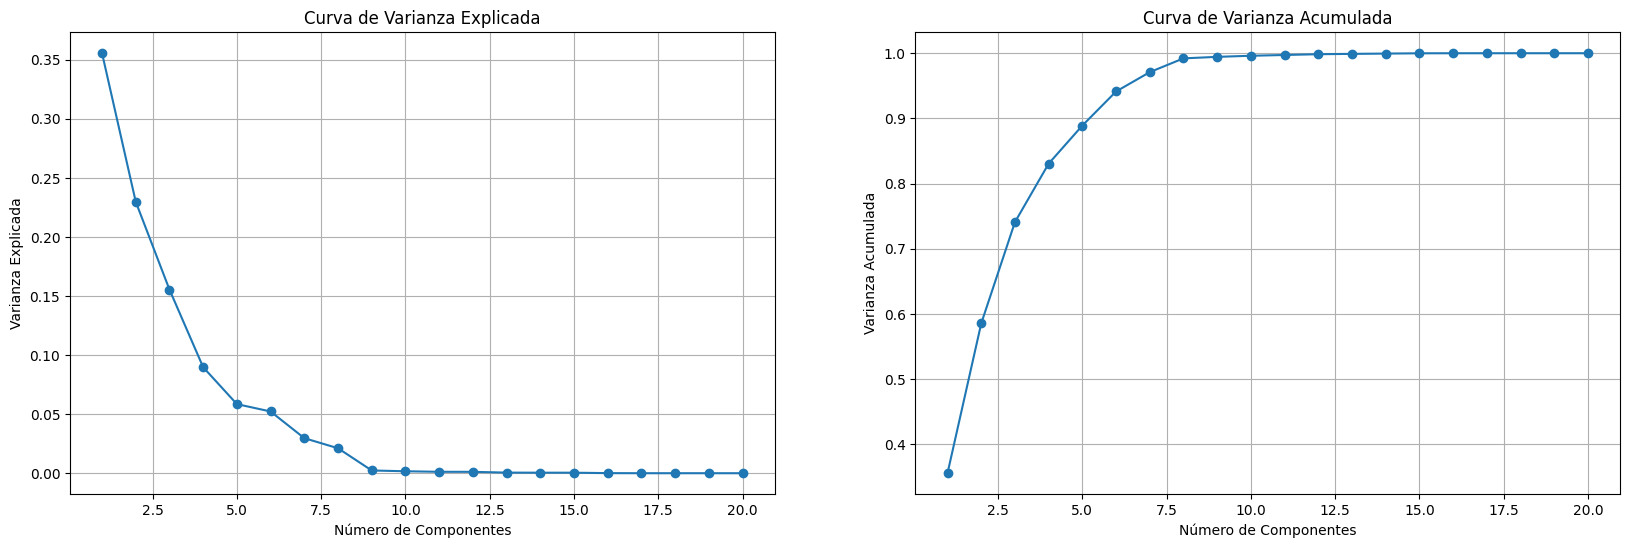

In [285]:
pca = PCA().fit(X_grouped)
fig,ax = plt.subplots(figsize=(20, 6),ncols=2, nrows=1)
ax[0].plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
ax[0].set_xlabel('Número de Componentes')
ax[0].set_ylabel('Varianza Explicada')
ax[0].set_title('Curva de Varianza Explicada')
ax[0].grid(True)
ax[1].plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), marker='o')
ax[1].set_xlabel('Número de Componentes')
ax[1].set_ylabel('Varianza Acumulada')
ax[1].set_title('Curva de Varianza Acumulada')
ax[1].grid(True)
plt.show()

In [286]:
n_components = pca.explained_variance_ratio_[pca.explained_variance_ratio_.cumsum() < 0.95].shape[0]
print(f'Número de componentes para explicar el 95% de la varianza: {n_components}')
pca = PCA(n_components).fit(X_grouped)
X_grouped_pca = pca.transform(X_grouped)

Número de componentes para explicar el 95% de la varianza: 6


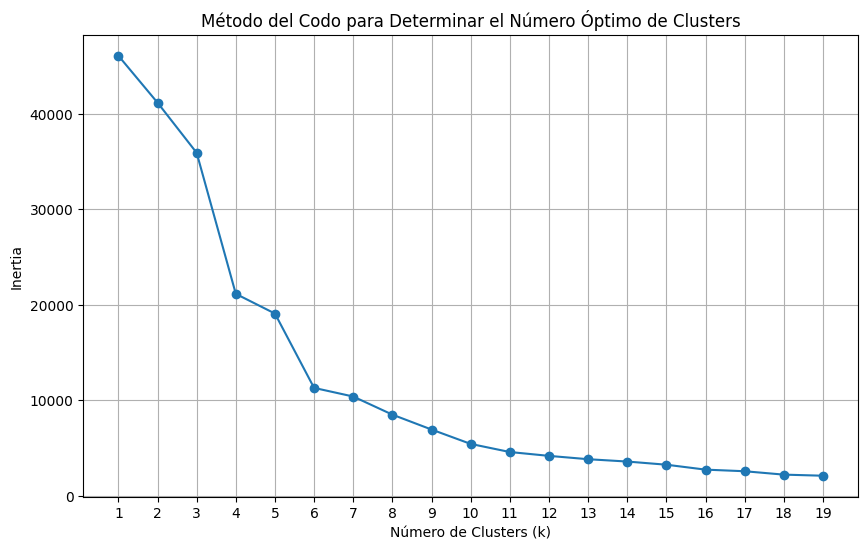

In [287]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Rango de valores de k a evaluar
k_values = range(1, 20)
inertia = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_grouped_pca)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inertia')
plt.title('Método del Codo para Determinar el Número Óptimo de Clusters')
plt.xticks(k_values)
plt.grid(True)
plt.show()


In [288]:
import numpy as np
best_k = 6
print(f"El número óptimo de clusters según el método del codo es: {best_k}")

El número óptimo de clusters según el método del codo es: 6


In [289]:
kmeans = KMeans(n_clusters=best_k, random_state=42)
kmeans.fit(X_grouped_pca)
grouped_data_01['cluster'] = kmeans.labels_

In [290]:
grouped_data_01['cluster'].value_counts().sort_index()

cluster
0      23
1    2861
2       2
3       2
4       8
5       1
Name: count, dtype: int64

<Axes: >

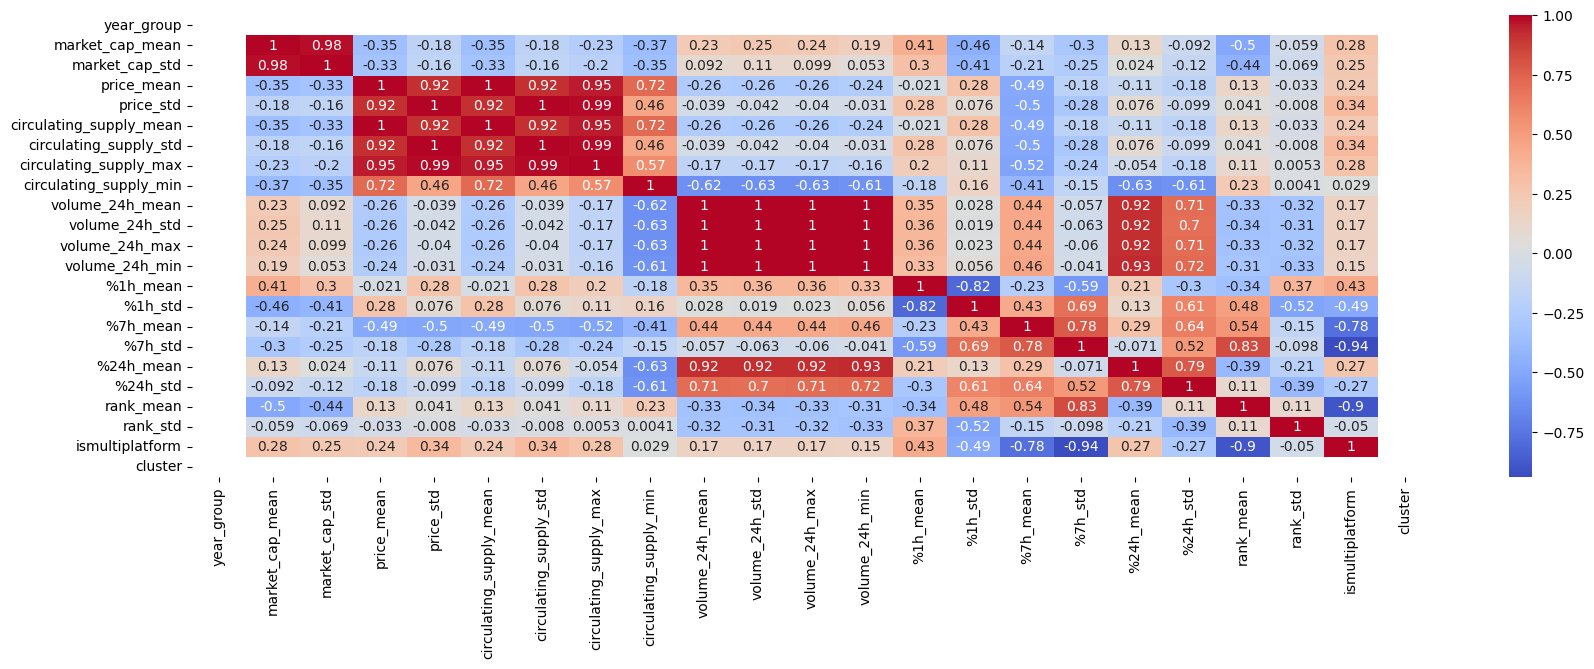

In [291]:
plt.figure(figsize=(20, 6))
sns.heatmap(grouped_data_01[grouped_data_01['cluster'] == 4].corr(numeric_only=True), annot=True, cmap='coolwarm')


In [292]:
grouped_data_01[grouped_data_01['cluster'] == 4]

,year_group,symbol,market_cap_mean,market_cap_std,price_mean,price_std,circulating_supply_mean,circulating_supply_std,circulating_supply_max,circulating_supply_min,...,%1h_std,%7h_mean,%7h_std,%24h_mean,%24h_std,rank_mean,rank_std,ismultiplatform,name,cluster
748,2020,42,-0.029322,1.673271e-04,31.389823,21.598337,-0.067387,0.000228,-0.066788,-0.067603,...,0.146263,-0.047338,0.072107,-0.024605,0.082584,0.200346,0.164817,1.0,42-coin,4
1204,2020,BTCB,0.013409,6.016463e-02,13.936310,5.180103,-0.067571,0.000055,-0.067475,-0.067672,...,0.173735,-0.039939,0.141130,-0.013772,0.157567,-1.045159,0.100591,1.0,Bitcoin BEP2,4
2106,2020,HBTC,-0.011339,6.504550e-03,16.544012,4.094710,-0.067544,0.000043,-0.067471,-0.067602,...,0.146253,-0.034614,0.041717,-0.037071,0.054544,-0.988700,0.012498,1.0,Huobi BTC,4
2770,2020,NANOX,-0.029565,2.564003e-08,10.648554,1.776064,-0.067606,0.000019,-0.067579,-0.067652,...,0.184706,-0.000799,0.369905,-0.036005,0.145741,1.979631,0.180642,0.0,Project-X,4
3242,2020,RBTC,-0.027891,2.917478e-03,10.375156,5.479686,-0.067609,0.000058,-0.067471,-0.067662,...,0.054135,-0.039277,0.031091,-0.034907,0.048578,-0.494463,0.199504,1.0,RSK Smart Bitcoin,4
3262,2020,RENBTC,0.003316,1.827442e-02,14.094484,5.105130,-0.067569,0.000054,-0.067470,-0.067645,...,0.062985,-0.037140,0.031051,-0.021158,0.054518,-0.940662,0.437709,1.0,renBTC,4
3959,2020,WBTC,0.153685,1.855085e-01,10.371292,5.497644,-0.067609,0.000058,-0.067470,-0.067662,...,0.050636,-0.039487,0.032654,-0.031253,0.048396,-1.208788,0.162950,1.0,Wrapped Bitcoin,4
4163,2020,YFI,0.031130,3.587791e-02,10.884705,6.548167,-0.067603,0.000069,-0.067496,-0.067699,...,0.131505,-0.013081,0.095480,0.030998,0.222599,-1.248984,0.061293,1.0,yearn.finance,4


In [294]:
partial_grouped_data['cluster']  = kmeans.labels_
partial_grouped_data['target'] = partial_grouped_data['cluster'].apply(lambda x: 1 if x == 4 else 0)

In [297]:
grouped_data.head()

,year_group,symbol,market_cap_mean,market_cap_std,price_mean,price_std,circulating_supply_mean,circulating_supply_std,circulating_supply_max,circulating_supply_min,...,%1h_mean,%1h_std,%7h_mean,%7h_std,%24h_mean,%24h_std,rank_mean,rank_std,ismultiplatform,name
0,2016,$$$,-0.029565,7.115937e-08,-0.047061,8.406879e-09,-0.064741,1.408039e-17,-0.064741,-0.064741,...,-0.130638,0.490673,0.003046,0.420923,-0.006186,0.248116,-0.527783,0.023940,0.0,Money
1,2016,020,-0.029564,5.765917e-07,-0.047061,1.992215e-11,9.775591,2.496344e-02,9.807497,9.733709,...,-0.192503,0.558486,0.336214,0.993899,-0.016526,0.220677,-0.773828,0.033109,0.0,020LondonCoin
2,2016,1337,-0.029561,1.818210e-06,-0.047061,1.895106e-09,0.767388,3.145264e-01,1.249566,0.203636,...,-0.100851,0.451937,-0.067596,0.347906,-0.026568,0.348370,-0.863741,0.090816,0.0,Elite
3,2016,1CR,-0.029555,1.169475e-05,-0.046119,1.026161e-03,-0.067715,7.566549e-07,-0.067713,-0.067716,...,-0.149120,0.837230,0.383548,2.031865,-0.011370,0.342152,-0.969894,0.228167,0.0,1CRedit
4,2016,1ST,-0.028679,3.192939e-04,-0.047005,2.023715e-05,-0.062167,7.277573e-18,-0.062167,-0.062167,...,0.053130,0.119176,0.003086,0.077292,0.022039,0.151679,-1.285940,0.007831,0.0,FirstBlood


In [302]:
X_partial_grouped = partial_grouped_data.drop(columns=['year_group', 'symbol', 'ismultiplatform','target'])

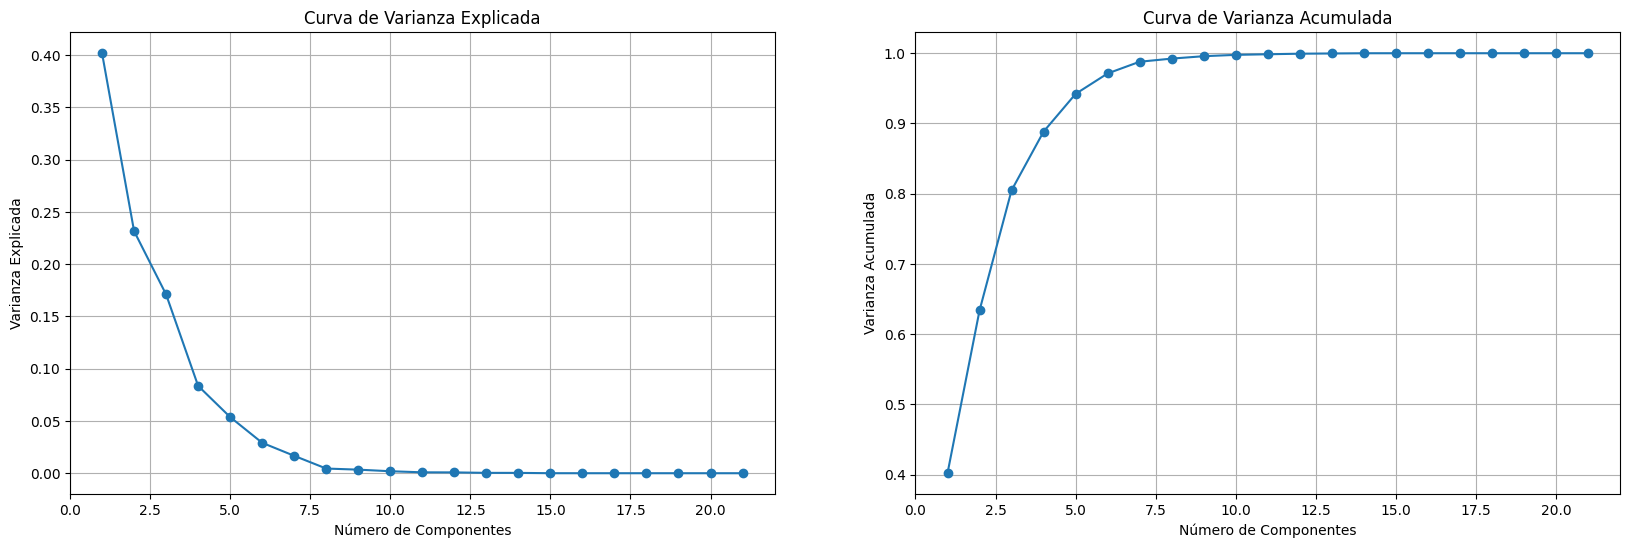

In [303]:
pca = PCA().fit(X_partial_grouped)
fig,ax = plt.subplots(figsize=(20, 6),ncols=2, nrows=1)
ax[0].plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
ax[0].set_xlabel('Número de Componentes')
ax[0].set_ylabel('Varianza Explicada')
ax[0].set_title('Curva de Varianza Explicada')
ax[0].grid(True)
ax[1].plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), marker='o')
ax[1].set_xlabel('Número de Componentes')
ax[1].set_ylabel('Varianza Acumulada')
ax[1].set_title('Curva de Varianza Acumulada')
ax[1].grid(True)
plt.show()

In [304]:
n_components = pca.explained_variance_ratio_[pca.explained_variance_ratio_.cumsum() < 0.95].shape[0]
print(f'Número de componentes para explicar el 95% de la varianza: {n_components}')
pca = PCA(n_components).fit(X_grouped)
X_grouped_pca = pca.transform(X_grouped)

Número de componentes para explicar el 95% de la varianza: 5


In [305]:
pca = PCA(n_components).fit(X_partial_grouped)
X_partial_grouped_pca = pca.transform(X_partial_grouped)

In [306]:
y_partial_grouped = partial_grouped_data['target']

In [307]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE

In [318]:
X_train, X_test, y_train, y_test = train_test_split(X_partial_grouped_pca, y_partial_grouped, test_size=0.2, random_state=42)


In [319]:
smote = SMOTE(k_neighbors=4, random_state=42)
X_train_selected, y_train = smote.fit_resample(X_train, y_train)

models = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'GradientBoosting': GradientBoostingClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42, algorithm='SAMME'),
    'SVM': SVC(random_state=42),
    'LogisticRegression': LogisticRegression(random_state=42),
    'VotingClassifier': VotingClassifier(estimators=[
        ('RandomForest', RandomForestClassifier(random_state=42)),
        ('GradientBoosting', GradientBoostingClassifier(random_state=42)),
        ('AdaBoost', AdaBoostClassifier(random_state=42, algorithm='SAMME')),
    ], voting='hard')
}

In [320]:
kfold = KFold(n_splits=5, random_state=42, shuffle=True)
results = {}
for model_name, model in models.items():
    cv_results = cross_val_score(model, X_train_selected, y_train, cv=kfold, scoring='accuracy')
    results[model_name] = cv_results.mean()
    print(f'{model_name}: {cv_results.mean()}')

RandomForest: 0.9997835497835498
GradientBoosting: 0.9997835497835498
AdaBoost: 0.9989186849186849
SVM: 0.9956749736749737
LogisticRegression: 0.9913501813501814
VotingClassifier: 0.9997835497835498


In [321]:
results = pd.Series(results).sort_values(ascending=False)
results

RandomForest          0.999784
GradientBoosting      0.999784
VotingClassifier      0.999784
AdaBoost              0.998919
SVM                   0.995675
LogisticRegression    0.991350
dtype: float64

In [322]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 3],
    'max_features': ['sqrt', 'log2'],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False]
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=kfold, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train_selected, y_train)
print(grid_search.best_params_)
best_rf = grid_search.best_estimator_
best_rf.fit(X_train_selected, y_train)

Fitting 5 folds for each of 864 candidates, totalling 4320 fits
{'bootstrap': True, 'criterion': 'gini', 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


RandomForestClassifier(max_depth=3, n_estimators=200, random_state=42)

In [323]:
best_rf.score(X_test, y_test)

0.9948275862068966

<Axes: >

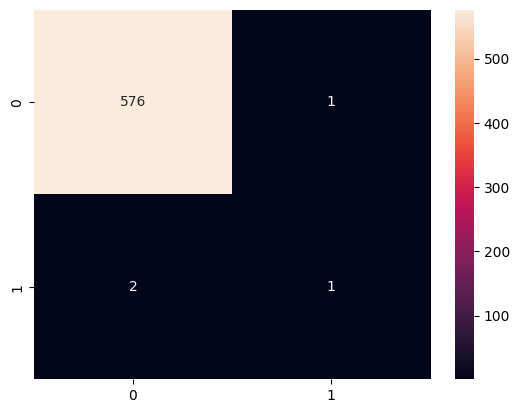

In [324]:
y_pred = best_rf.predict(X_test)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')

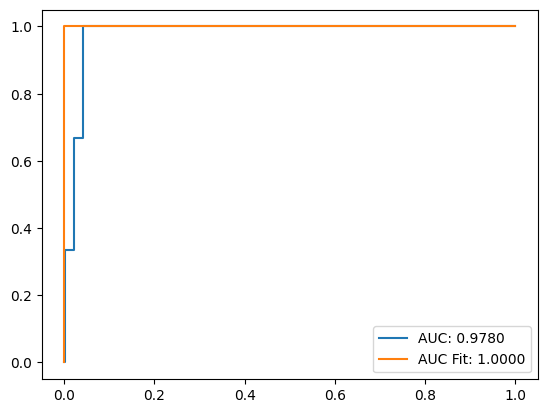

In [325]:
auc_score_predict = roc_auc_score(y_test, best_rf.predict_proba(X_test)[:, 1])
auc_score_fit = roc_auc_score(y_train, best_rf.predict_proba(X_train_selected)[:, 1])
fpr, tpr, _ = roc_curve(y_test, best_rf.predict_proba(X_test)[:, 1])
fpr_fit, tpr_fit, _ = roc_curve(y_train, best_rf.predict_proba(X_train_selected)[:, 1])
plt.plot(fpr, tpr, label=f'AUC: {auc_score_predict:.4f}')
plt.plot(fpr_fit, tpr_fit, label=f'AUC Fit: {auc_score_fit:.4f}')
plt.legend()
